**Import Necessary Libraries**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

**Generate Synthetic Dataset with 5 Classes**

In [2]:
X, Y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_repeated=0, 
                           n_classes=5, n_clusters_per_class=1)

**One-Hot Encode Target Labels**

In [3]:
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y.reshape(-1, 1))

**Splitting into Training and Testing Sets**

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

**Neural Network**

In [5]:
class NeuralNetwork(object):
    def __init__(self):
        # Network architecture
        inputLayerNeurons = 3
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 8
        hiddenLayer3Neurons = 6
        outputLayerNeurons = 5  # 5 classes
        
        self.learning_rate = 0.05 # Optimizing learning rate
        
        # Initializing weights
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_HI2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_HI3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_OH = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def softmax(self, x):
        # Ensuring x is a 2D array
        x = np.array(x)
        if len(x.shape) == 1:
            x = x.reshape(1, -1)  # Adding a batch dimension if it's missing
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def cross_entropy_loss(self, Y_true, Y_pred):
        # Avoiding log(0) by adding a small constant
        Y_pred = np.clip(Y_pred, 1e-12, 1.0)
        # Calculating cross-entropy loss
        return -np.sum(Y_true * np.log(Y_pred)) / Y_true.shape[0]

    def feedForward(self, X):
        # Ensuring X is a 2D array
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(1, -1)  # Adding a batch dimension if it's missing

        # Hidden layers
        self.hidden_output1 = self.sigmoid(np.dot(X, self.W_HI1))
        self.hidden_output2 = self.sigmoid(np.dot(self.hidden_output1, self.W_HI2))
        self.hidden_output3 = self.sigmoid(np.dot(self.hidden_output2, self.W_HI3))

        # Output layer
        output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        # Output layer error and delta
        output_error = Y - pred
        output_delta = self.learning_rate * output_error  # Softmax derivative handled implicitly
        
        # Hidden layers error and delta
        hidden_error3 = output_delta.dot(self.W_OH.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(self.hidden_output3, der=True)
        
        hidden_error2 = hidden_delta3.dot(self.W_HI3.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)
        
        hidden_error1 = hidden_delta2.dot(self.W_HI2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)
        
        # Updating weights
        self.W_HI1 += X.T.dot(hidden_delta1)
        self.W_HI2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_HI3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_OH += self.hidden_output3.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

NN = NeuralNetwork()

**Training Model**

In [6]:
err = []
epochs = 10000
for i in range(epochs):
    NN.train(X_train, Y_train)
    if i % 100 == 0:
        pred = NN.feedForward(X_train)
        loss = NN.cross_entropy_loss(Y_train, pred)
        err.append(loss)
        print(f"Epoch {i}, Loss: {loss}")

Epoch 0, Loss: 5.971259681470112
Epoch 100, Loss: 1.556959728853418
Epoch 200, Loss: 1.604659073216228
Epoch 300, Loss: 1.40551347288903
Epoch 400, Loss: 1.3241746062721143
Epoch 500, Loss: 0.7777657688882291
Epoch 600, Loss: 0.7871960986835392
Epoch 700, Loss: 0.7073110220375708
Epoch 800, Loss: 0.667304990242002
Epoch 900, Loss: 0.643700771401074
Epoch 1000, Loss: 0.6260885894739826
Epoch 1100, Loss: 0.611980975515079
Epoch 1200, Loss: 0.6001837641326463
Epoch 1300, Loss: 0.5891366680836783
Epoch 1400, Loss: 0.5763620596832757
Epoch 1500, Loss: 0.5587305105041368
Epoch 1600, Loss: 0.5378452761265128
Epoch 1700, Loss: 0.5219722414591587
Epoch 1800, Loss: 0.5119350867829798
Epoch 1900, Loss: 0.504683015166594
Epoch 2000, Loss: 0.4987256968707158
Epoch 2100, Loss: 0.4935067192419216
Epoch 2200, Loss: 0.48876450828470525
Epoch 2300, Loss: 0.48435117662442073
Epoch 2400, Loss: 0.4801784887543875
Epoch 2500, Loss: 0.47619172560376155
Epoch 2600, Loss: 0.4723534515840393
Epoch 2700, Loss: 0

**Plott Loss Over Epochs**

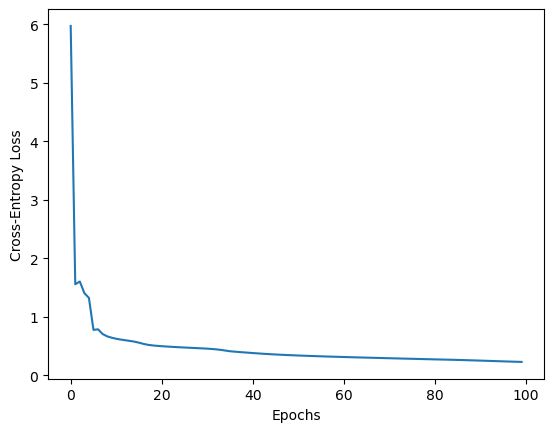

In [7]:
plt.plot(err)
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.show()

**Test Model**

In [8]:
test_predictions = NN.feedForward(X_test)
test_predictions = np.argmax(test_predictions, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

**Accuracy and Loss**

In [9]:
accuracy = np.mean(test_predictions == Y_test_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Loss: {loss * 100:.2f}%')

Accuracy: 91.50%
Loss: 23.01%


**Additional Evaluation**

In [10]:
precision = precision_score(Y_test_labels, test_predictions, average=None, zero_division=0)
recall = recall_score(Y_test_labels, test_predictions, average=None, zero_division=0)
f1 = f1_score(Y_test_labels, test_predictions, average=None, zero_division=0)

print(f'Precision per class: {precision}')
print(f'Recall per class: {recall}')
print(f'F1-Score per class: {f1}')

print(' ')

precision = precision_score(Y_test_labels, test_predictions, average='weighted')
recall = recall_score(Y_test_labels, test_predictions, average='weighted')
f1 = f1_score(Y_test_labels, test_predictions, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Precision per class: [0.86666667 0.93939394 0.89130435 0.97222222 0.925     ]
Recall per class: [0.95121951 0.91176471 0.89130435 0.92105263 0.90243902]
F1-Score per class: [0.90697674 0.92537313 0.89130435 0.94594595 0.91358025]
 
Precision: 91.67%
Recall: 91.50%
F1 Score: 91.53%


**Confusion Matrix**

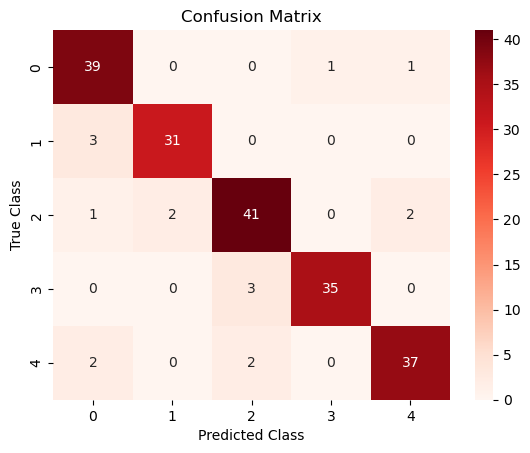

In [11]:
conf_matrix = confusion_matrix(Y_test_labels, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Code Description
All necessary libraries are imported which are used throughout the project. A synthetic dataset of 1000 samples with 5 distinct classes is generated using `make_classification` library. The `OneHotEncoder` is used to transform the class labels into a format suitable for multi-class classification. The dataset is then divided in train and test in 80-20 proportion. The neural network's architecture is modified to include three hidden layers, each using the sigmoid activation function, while the output layer uses softmax to convert predictions into class probabilities. Cross-entropy loss is implemented to calculate the error. During backpropagation, the network's weights were updated by computing the gradients layer-by-layer. The model was trained for 10,000 epochs with a learning rate of 0.05.  Precision, recall, and F1-scores were calculated, indicating the model's performance across all classes and the confusion matrix provided additional insight into the network’s predictions, helping to identify any misclassifications.

# Discussion
The dataset is generated with five distinct classes and the network architecture was expanded to include three hidden layers. The output layer is modified to have five neurons to represent one of the classes. A key addition to the model is the use of the softmax activation function in the output layer, which converts the raw output values into class probabilities. The backpropagation algorithm is also adapted to handle multi-class classification by implementing cross-entropy loss, which is more appropriate for this type of problem than mean squared error. Additionally, the learning rate was tuned through experimentation. A learning rate of 0.05 yielded the best performance, with a final loss of around 20%. Finding the right learning rate through trial and error was a challenge, but ultimately helped improve the stability and convergence of the model. After training for 10,000 epochs, the final loss was around 20%, with an accuracy of around 90%. The precision, recall, and F1-score were calculated for each of the five classes and each value was observed to surpass 85%. These metrics indicate that the network was performing well across all classes, with no significant class imbalance or misrepresentation. By tuning the number of neurons in each hidden layer, the network was able to learn more intricate patterns in the data, leading to better accuracy. Upon performance comparison, changing either the learning rate value or the hidden layer neurons' values significantly impacted the results. The project is successfully implemented a three-hidden-layer neural network for multi-class classification. Potential improvements could involve exploring different activation functions in the hidden layers to improve convergence rates or experimenting with more advanced optimization techniques. Additionally, increasing the dataset size or adding more informative features could further enhance the network’s generalization capabilities. It can easily be outlined that fine-tuning model architectures and hyperparameters to achieve optimal performance in multi-class classification tasks is important.